In [36]:
import json
import math
import numpy as np

class ParticleInteraction:
    def __init__(self, small_particles, cx_large, cy_large, radius_large):
        self.small_particles = small_particles
        self.num_of_small_particles = len(small_particles)
        self.cx_large, self.cy_large, self.radius_large = cx_large, cy_large, radius_large

    def calculate_properties(self):
        r_points_list = []
        for id, particle in self.small_particles.items():
            cx_small = particle["cx"]
            cy_small = particle["cy"]
            radius_small = particle["diameter"] / 2

            rcx_small = cx_small - self.cx_large
            rcy_small = cy_small - self.cy_large

            if rcy_small == 0:
                phi = 0
            else:
                phi = math.atan(rcx_small / rcy_small)
            theta = math.asin(rcx_small / (math.cos(phi) * (self.radius_large + radius_small)))
            math.degrees(phi), math.degrees(theta)

            rcz_small = (self.radius_large + radius_small) * math.cos(theta)

            rcx_touch = self.radius_large * math.sin(theta) * math.cos(phi) 
            rcy_touch = self.radius_large * math.sin(theta) * math.sin(phi)
            rcz_touch = self.radius_large * math.cos(theta)
            r_point_touching = [rcx_touch, rcy_touch, rcz_touch]
            r_point_center = [rcx_small, rcy_small, rcz_small]

            self.small_particles[id]["rPointTouching"] = r_point_touching
            self.small_particles[id]["rPointCenter"] = r_point_center
            self.small_particles[id]["phi"] = phi
            self.small_particles[id]["theta"] = theta
            
            r_points_list.append(r_point_touching)
        return small_particles

        # print(self.small_particles)


small_particles = {
    "p0": {
        "cx": 100,
        "cy": 100,
        "diameter": 10
    },
    "p1": {
        "cx": 70,
        "cy": 10,
        "diameter": 8
    },
    "p2": {
        "cx": 40,
        "cy": 10,
        "diameter": 8
    },
    "p3": {
        "cx": 50,
        "cy": 50,
        "diameter": 12
    }
}

cx_large, cy_large, radius_large = 50, 50, 100
interaction = ParticleInteraction(small_particles, cx_large, cy_large, radius_large)
small_particles_result = interaction.calculate_properties()

json_string = json.dumps(small_particles_result, ensure_ascii=False, indent=4)
print(json_string)


{
    "p0": {
        "cx": 100,
        "cy": 100,
        "diameter": 10,
        "rPointTouching": [
            47.61904761904762,
            47.61904761904762,
            73.92464141076202
        ],
        "rPointCenter": [
            50,
            50,
            77.62087348130012
        ],
        "phi": 0.7853981633974483,
        "theta": 0.7388456747780925
    },
    "p1": {
        "cx": 70,
        "cy": 10,
        "diameter": 8,
        "rPointTouching": [
            19.230769230769234,
            -9.615384615384617,
            97.66126096611248
        ],
        "rPointCenter": [
            20,
            -40,
            101.56771140475698
        ],
        "phi": -0.4636476090008061,
        "theta": 0.21669852266276596
    },
    "p2": {
        "cx": 40,
        "cy": 10,
        "diameter": 8,
        "rPointTouching": [
            -9.615384615384617,
            -2.403846153846154,
            99.50761730825869
        ],
        "rPointCenter": [
 

In [37]:
points = []
for i in list(small_particles_result.keys()):
    points.append(small_particles_result[i]["rPointTouching"])
points = np.array(points)/100
points

array([[ 0.47619048,  0.47619048,  0.73924641],
       [ 0.19230769, -0.09615385,  0.97661261],
       [-0.09615385, -0.02403846,  0.99507617],
       [ 0.        ,  0.        ,  1.        ]])

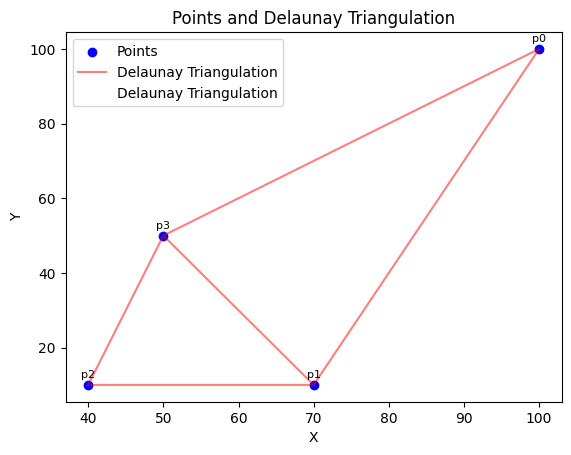

{'p0': {'cx': 100,
  'cy': 100,
  'diameter': 10,
  'rPointTouching': [47.61904761904762, 47.61904761904762, 73.92464141076202],
  'rPointCenter': [50, 50, 77.62087348130012],
  'phi': 0.7853981633974483,
  'theta': 0.7388456747780925,
  'nearest_points': ['p0']},
 'p1': {'cx': 70,
  'cy': 10,
  'diameter': 8,
  'rPointTouching': [19.230769230769234,
   -9.615384615384617,
   97.66126096611248],
  'rPointCenter': [20, -40, 101.56771140475698],
  'phi': -0.4636476090008061,
  'theta': 0.21669852266276596,
  'nearest_points': ['p1']},
 'p2': {'cx': 40,
  'cy': 10,
  'diameter': 8,
  'rPointTouching': [-9.615384615384617,
   -2.403846153846154,
   99.50761730825869],
  'rPointCenter': [-10, -40, 103.48792200058904],
  'phi': 0.24497866312686414,
  'theta': -0.09927610900819937,
  'nearest_points': ['p2']},
 'p3': {'cx': 50,
  'cy': 50,
  'diameter': 12,
  'rPointTouching': [0.0, 0.0, 100.0],
  'rPointCenter': [0, 0, 106.0],
  'phi': 0,
  'theta': 0.0,
  'nearest_points': ['p3']}}

In [38]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def add_nearest_points(data):
    # Extract point coordinates and IDs from the data
    points = [(value['cx'], value['cy']) for value in data.values()]

    # Perform Delaunay triangulation
    tri = Delaunay(points)

    # Create a dictionary to store the nearest point IDs
    updated_data = {key: value for key, value in data.items()}

    # Iterate over each point in the data
    for i, key in enumerate(updated_data):
        point = points[i]
        nearest_points = []

        # Find the indices of the neighboring points in the triangulation
        indices = tri.vertex_neighbor_vertices[1][tri.vertex_neighbor_vertices[0][i]]

        # Convert the scalar value to a list
        indices = [indices] if np.isscalar(indices) else indices

        # Get the IDs of the nearest points
        for index in indices:
            if index != -1:
                nearest_point = list(updated_data.keys())[list(points).index(point)]
                nearest_points.append(nearest_point)

        # Add the nearest point IDs to the updated data
        updated_data[key]['nearest_points'] = nearest_points

    return updated_data

def plot_points_and_triangulation(data):
    # Extract point coordinates from the data
    points = np.array([(value['cx'], value['cy']) for value in data.values()])

    # Perform Delaunay triangulation
    tri = Delaunay(points)

    # Plot points
    plt.scatter(points[:, 0], points[:, 1], color='blue', label='Points')

    # Plot Delaunay triangulation
    plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='red', alpha=0.5, label='Delaunay Triangulation')

    # Add point IDs as labels
    for key, value in data.items():
        plt.annotate(key, (value['cx'], value['cy']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Points and Delaunay Triangulation')
    plt.legend()
    plt.show()

# Example usage
data = {
    "p0": {
        "cx": 100,
        "cy": 100,
        "diameter": 10,
        "rPointTouching": [
            47.61904761904762,
            47.61904761904762,
            73.92464141076202
        ],
        "rPointCenter": [
            50,
            50,
            77.62087348130012
        ],
        "phi": 0.7853981633974483,
        "theta": 0.7388456747780925
    },
    "p1": {
        "cx": 70,
        "cy": 10,
        "diameter": 8,
        "rPointTouching": [
            19.230769230769234,
            -9.615384615384617,
            97.66126096611248
        ],
        "rPointCenter": [
            20,
            -40,
            101.56771140475698
        ],
        "phi": -0.4636476090008061,
        "theta": 0.21669852266276596
    },
    "p2": {
        "cx": 40,
        "cy": 10,
        "diameter": 8,
        "rPointTouching": [
            -9.615384615384617,
            -2.403846153846154,
            99.50761730825869
        ],
        "rPointCenter": [
            -10,
            -40,
            103.48792200058904
        ],
        "phi": 0.24497866312686414,
        "theta": -0.09927610900819937
    },
    "p3": {
        "cx": 50,
        "cy": 50,
        "diameter": 12,
        "rPointTouching": [
            0.0,
            0.0,
            100.0
        ],
        "rPointCenter": [
            0,
            0,
            106.0
        ],
        "phi": 0,
        "theta": 0.0
    }
}

# Add nearest point IDs
updated_data = add_nearest_points(data)

# Plot points and Delaunay triangulation
plot_points_and_triangulation(updated_data)
updated_data

In [48]:
def add_neighboring_points(datajson):
    # Extract point coordinates and IDs from the data
    points = [(value['cx'], value['cy']) for value in datajson.values()]

    # Perform Delaunay triangulation
    tri = Delaunay(points)

    # Iterate over each point in the data
    for i, key in enumerate(datajson):
        neighboring_points = []

        # Find the indices of the neighboring points in the triangulation
        simplex_indices = np.where(tri.simplices == i)[0]
        neighboring_indices = np.unique(tri.simplices[simplex_indices].flatten())

        # Get the IDs of the neighboring points
        for index in neighboring_indices:
            if index != i:
                neighboring_point = list(datajson.keys())[index]
                neighboring_points.append(neighboring_point)

        # Add the neighboring point IDs to the data
        datajson[key]['neighboring_points'] = neighboring_points

    return datajson


myjson = add_neighboring_points(small_particles_result)

In [59]:
def get_neighboring_pairs(datajson):
    neighboring_pairs = []

    # Iterate over each point in the data
    for point_id, point_data in datajson.items():
        neighboring_points = point_data['neighboring_points']

        # Create pairs of neighboring points with the current point
        pairs = [[point_id, neighbor] for neighbor in neighboring_points]

        # Add the pairs to the list
        neighboring_pairs.extend(pairs)

    # Sort the neighboring pairs based on point names
    neighboring_pairs.sort(key=lambda pair: (pair[0], pair[1]))

    # Convert the list of pairs into a set of frozensets
    unique_pairs = set(frozenset(pair) for pair in neighboring_pairs)

    # Convert the frozensets back into a list of pairs
    unique_list = [list(pair) for pair in unique_pairs]

    return unique_list


# Get the neighboring pairs
neighboring_pairs = get_neighboring_pairs(myjson)

# Print the neighboring pairs
neighboring_pairs

[['p3', 'p2'], ['p1', 'p3'], ['p1', 'p2'], ['p3', 'p0'], ['p1', 'p0']]

In [ ]:
def calculate_distance(datainput, p0, p1, R):
    # 点p0のデータ
    cx0 = datainput[p0]["cx"]
    cy0 = datainput[p0]["cy"]
    phi0 = datainput[p0]["phi"]
    theta0 = datainput[p0]["theta"]

    # 点p1のデータ
    cx1 = datainput[p1]["cx"]
    cy1 = datainput[p1]["cy"]
    phi1 = datainput[p1]["phi"]
    theta1 = datainput[p1]["theta"]

    # p0とp1の球面上の距離を計算
    distance = R * math.acos(math.sin(phi0) * math.sin(phi1) +
                             math.cos(phi0) * math.cos(phi1) * math.cos(theta0 - theta1))

    return distance

In [61]:
import pandas as pd
import math

def calculate_distances_dataframe(datainput, datainput_cal, R):
    distances = []
    for pair in datainput_cal:
        p0 = pair[0]
        p1 = pair[1]

        # 点p0のデータ
        cx0 = datainput[p0]["cx"]
        cy0 = datainput[p0]["cy"]
        phi0 = datainput[p0]["phi"]
        theta0 = datainput[p0]["theta"]

        # 点p1のデータ
        cx1 = datainput[p1]["cx"]
        cy1 = datainput[p1]["cy"]
        phi1 = datainput[p1]["phi"]
        theta1 = datainput[p1]["theta"]

        # p0とp1の球面上の距離を計算
        distance = R * math.acos(math.sin(phi0) * math.sin(phi1) +
                                 math.cos(phi0) * math.cos(phi1) * math.cos(theta0 - theta1))

        distances.append(distance)

    df = pd.DataFrame({'Point Pair': datainput_cal, 'Distance': distances})
    return df


datainput_cal = [['p3', 'p2'], ['p1', 'p3'], ['p1', 'p2'], ['p3', 'p0'], ['p1', 'p0']]
R = 100

df = calculate_distances_dataframe(myjson, neighboring_pairs, R)
print(df)

  Point Pair    Distance
0   [p3, p2]   26.395493
1   [p1, p3]   50.843205
2   [p1, p2]   77.231221
3   [p3, p0]  102.075067
4   [p1, p0]  133.671110


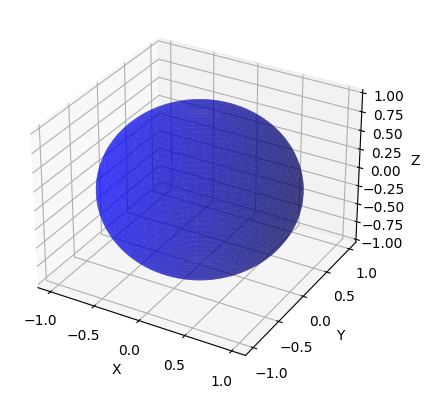

In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_sphere(center, radius):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 球体のパラメータ
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))

    # 球体をプロット
    ax.plot_surface(x, y, z, color='b', alpha=0.5)

    # 軸ラベルの設定
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # グラフ表示
    plt.show()

# 座標と半径の設定
center = (0, 0, 0)
radius = 1

# 球体のプロット
plot_sphere(center, radius)

center = myjson[p0]["Point"]
plot_sphere(center, radius)